In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import train_test_split

## Read and Understand Data for KNN Model

In [2]:
# read

df = pd.read_csv('teleCust1000t.csv')
df.head(5)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
# understand

df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [4]:
# obtain x

x = df[df.columns[:-1]].values
x[:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [5]:
# normalize x

scaler = preprocessing.StandardScaler().fit(x)
x = scaler.transform(x)
x[:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [6]:
# obtain y

y = df[df.columns[-1]].values
y[:5]

array([1, 4, 3, 1, 3], dtype=int64)

In [7]:
# seprate to train and test 

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 4)
train_x.shape, test_x.shape

((800, 11), (200, 11))

## KNN Model

In [8]:
# create and test model

from sklearn.neighbors import KNeighborsClassifier

k = 4
model = KNeighborsClassifier(k).fit(train_x, train_y)

train_y_ = model.predict(train_x)
test_y_ = model.predict(test_x)

metrics.accuracy_score(train_y, train_y_), metrics.accuracy_score(test_y, test_y_)

(0.5475, 0.32)

In [9]:
# find the best k:

for k in range(1, 20):
    model = KNeighborsClassifier(k).fit(train_x, train_y)
    train_y_ = model.predict(train_x)
    test_y_ = model.predict(test_x)
    print(f'k = {k:2}: mean accuracy: {metrics.accuracy_score(test_y, test_y_):.3f}, std accuracy: {np.std(test_y == test_y_)/ np.sqrt(test_y.shape[0]):.5f}')

k =  1: mean accuracy: 0.300, std accuracy: 0.03240
k =  2: mean accuracy: 0.290, std accuracy: 0.03209
k =  3: mean accuracy: 0.315, std accuracy: 0.03285
k =  4: mean accuracy: 0.320, std accuracy: 0.03298
k =  5: mean accuracy: 0.315, std accuracy: 0.03285
k =  6: mean accuracy: 0.310, std accuracy: 0.03270
k =  7: mean accuracy: 0.335, std accuracy: 0.03337
k =  8: mean accuracy: 0.325, std accuracy: 0.03312
k =  9: mean accuracy: 0.340, std accuracy: 0.03350
k = 10: mean accuracy: 0.330, std accuracy: 0.03325
k = 11: mean accuracy: 0.315, std accuracy: 0.03285
k = 12: mean accuracy: 0.340, std accuracy: 0.03350
k = 13: mean accuracy: 0.330, std accuracy: 0.03325
k = 14: mean accuracy: 0.315, std accuracy: 0.03285
k = 15: mean accuracy: 0.340, std accuracy: 0.03350
k = 16: mean accuracy: 0.360, std accuracy: 0.03394
k = 17: mean accuracy: 0.355, std accuracy: 0.03384
k = 18: mean accuracy: 0.350, std accuracy: 0.03373
k = 19: mean accuracy: 0.345, std accuracy: 0.03361


In [10]:
# predict with k = 16

nx = [[4, 18, 20, 0, 8, 136, 6, 6, 0, 1, 8]]
nx = scaler.transform(nx)

model = KNeighborsClassifier(16).fit(train_x, train_y)
model.predict(nx)

array([4], dtype=int64)

## Read and Understand Data for Decision Tree Model

In [11]:
# read

df = pd.read_csv('drug200.csv')
df.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [12]:
# understand

df['Drug'].value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [13]:
# obtain x

x = df[df.columns[:-1]].values
x[:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [14]:
# encode qualitative columns

sexEncode = preprocessing.LabelEncoder().fit(df['Sex'].unique())
bpEncode = preprocessing.LabelEncoder().fit(df['BP'].unique())
cholestrolEncode = preprocessing.LabelEncoder().fit(df['Cholesterol'].unique())

x[:,1], x[:,2], x[:,3] = sexEncode.transform(x[:,1]), bpEncode.transform(x[:,2]), cholestrolEncode.transform(x[:,3]) 
x[:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [15]:
# obtain y

y = df[df.columns[-1]].values
y[:5]

array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY'], dtype=object)

In [16]:
# seprate to train and test 

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 4)
train_x.shape, test_x.shape

((160, 5), (40, 5))

## Decision Tree Model

In [17]:
# create and test model

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4).fit(train_x, train_y)

train_y_ = model.predict(train_x)
test_y_ = model.predict(test_x)

metrics.accuracy_score(train_y, train_y_), metrics.accuracy_score(test_y, test_y_)

(1.0, 0.95)

In [18]:
# predict

nx = [[28, 'M', 'HIGH', 'HIGH', 20.355]]

nx[0][1] = sexEncode.transform([nx[0][1]])[0]
nx[0][2] = bpEncode.transform([nx[0][2]])[0]
nx[0][3] = cholestrolEncode.transform([nx[0][3]])[0]

model.predict(nx)

array(['drugY'], dtype=object)

## Read and Understand Data for Logistic Regression Model

In [19]:
# read

df = pd.read_csv('ChurnData.csv')
df.head(5)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [20]:
# clean

df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'churn']]
df['churn'] = df['churn'].astype('int')
df.head(5)

,tenure,age,address,income,ed,employ,equip,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,0


In [21]:
# understand

df['churn'].value_counts()

0    142
1     58
Name: churn, dtype: int64

In [22]:
# obtain x

x = df[df.columns[:-1]].values
x[:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [23]:
# normalize x

scaler = preprocessing.StandardScaler().fit(x)
x = scaler.transform(x)
x[:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

In [24]:
# obtain y

y = df[df.columns[-1]].values
y[:5]

array([1, 1, 0, 0, 0])

In [25]:
# seprate to train and test 

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 4)
train_x.shape, test_x.shape

((160, 7), (40, 7))

## Logistic Regression Model

In [26]:
# create model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=0.01, solver='liblinear').fit(train_x, train_y) # other solvers: ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ / to reduce overfit

train_y_ = model.predict(train_x)
test_y_ = model.predict(test_x)

train_y_p = model.predict_proba(train_x)
test_y_p = model.predict_proba(test_x)

test_y[:5], test_y_[:5], test_y_p[:5]

(array([0, 0, 1, 0, 1]),
 array([0, 0, 0, 0, 0]),
 array([[0.54132919, 0.45867081],
        [0.60593357, 0.39406643],
        [0.56277713, 0.43722287],
        [0.63432489, 0.36567511],
        [0.56431839, 0.43568161]]))

In [27]:
# test model

metrics.log_loss(test_y, test_y_p), metrics.jaccard_score(test_y, test_y_, pos_label = 0), metrics.jaccard_score(test_y, test_y_, pos_label = 1)

(0.6017092478101185, 0.7058823529411765, 0.375)

Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]


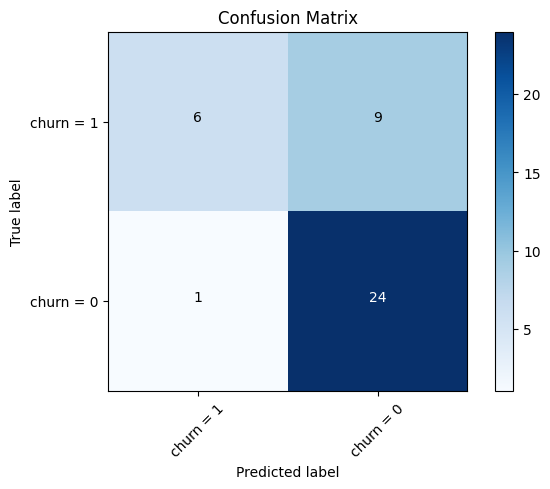

In [28]:
# show confusion matrix

from sklearn.metrics import confusion_matrix
import itertools

# This function prints and plots the confusion matrix. Normalization can be applied by setting `normalize=True`.

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# compute confusion matrix
cnf_matrix = confusion_matrix(test_y, test_y_, labels=[1,0])
np.set_printoptions(precision=2)


# plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ['churn = 1','churn = 0'], normalize = False, title='Confusion Matrix')

In [29]:
# show classification report

print(metrics.classification_report(test_y, test_y_))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



## Read and Understand Data for SVM Model

In [30]:
# read

df = pd.read_csv('cell_samples.csv')
df.head(5)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [31]:
# check dtypes

df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [32]:
# make column 'BareNuc' numeric

df = df[pd.to_numeric(df['BareNuc'], errors = 'coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int64')
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [33]:
# understand

df['Class'].value_counts()

2    444
4    239
Name: Class, dtype: int64

In [34]:
# obtain x

x = df[df.columns[1:-1]].values
x[:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [35]:
# obtain y

y = df[df.columns[-1]].values
y[:5]

array([2, 2, 2, 2, 2], dtype=int64)

In [36]:
# seprate to train and test 

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 4)
train_x.shape, test_x.shape

((546, 9), (137, 9))

## SVM Model

In [37]:
# create and test model

from sklearn import svm

model = svm.SVC(kernel = 'rbf').fit(train_x, train_y) 

train_y_ = model.predict(train_x)
test_y_ = model.predict(test_x)

metrics.f1_score(y_test, yhat, average='weighted'),
metrics.jaccard_score(test_y, test_y_, pos_label = 2),
metrics.jaccard_score(test_y, test_y_, pos_label = 4)

(0.9444444444444444, 0.9038461538461539)

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


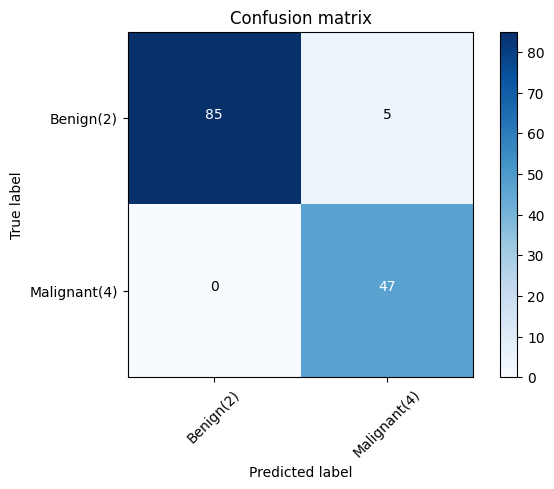

In [38]:
# compute confusion matrix
cnf_matrix = confusion_matrix(test_y, test_y_, labels = [2, 4])
np.set_printoptions(precision = 2)

# plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)', 'Malignant(4)'], normalize = False, title='Confusion matrix')

In [40]:
# show classification report

print(metrics.classification_report(test_y, test_y_))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

